In [1]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.lines import Line2D 
import matplotlib as mpl
import seaborn as sns

In [2]:
#set plotting format to be used later
%matplotlib inline 
mpl.rcParams['font.size']=10
mpl.rcParams['lines.linewidth']=1
mpl.rcParams['xtick.labelsize']=5
mpl.rcParams['axes.titlesize']=10
sns.set(rc={'figure.figsize':(12,7)})
sns.set_style('whitegrid')
sns.set_context("poster", font_scale=1)

In [3]:
#define values of interest
velocity = np.linspace(10,80,8)
force = [25,70,380,550,610,1220,830,1450]

In [4]:
#calculate a1 and a0 constants to be used in linear fit
a1 = ((len(velocity)*sum(velocity*force))-(sum(velocity)*sum(force)))/((len(force)*sum(velocity**2))-((sum(velocity))**2))
a0 = ((sum(force)/len(force)) - (a1*(sum(velocity)/len(velocity))))

In [5]:
#for exponential and power fits, convert to linear equation first and then use above formulas

In [6]:
#exponential fit converted to linear form:   ln(y) = ln(a) + bx 
# *** note: only y variable is 
ln_force = np.log(force)
#calculate a1 and a0 constants to be used in linear fits
exp_a1 = ((len(velocity)*sum(velocity*ln_force))-(sum(velocity)*sum(ln_force)))/((len(ln_force)*sum(velocity**2))-((sum(velocity))**2))
exp_a0 = np.exp((sum(ln_force)/len(ln_force)) - (exp_a1*(sum(velocity)/len(velocity))))

In [7]:
#power fit converted to linear form : ln(y) = ln(a) + b*ln(x) 
ln_velocity = np.log(velocity)
ln_force = np.log(force)
#calculate a1 and a0 constants to be used in linear fits
pwr_a1 = ((len(ln_velocity)*sum(ln_velocity*ln_force))-(sum(ln_velocity)*sum(ln_force)))/((len(ln_force)*sum(ln_velocity**2))-((sum(ln_velocity))**2))
pwr_a0 = np.exp((sum(ln_force)/len(ln_force)) - (pwr_a1*(sum(ln_velocity)/len(ln_velocity))))

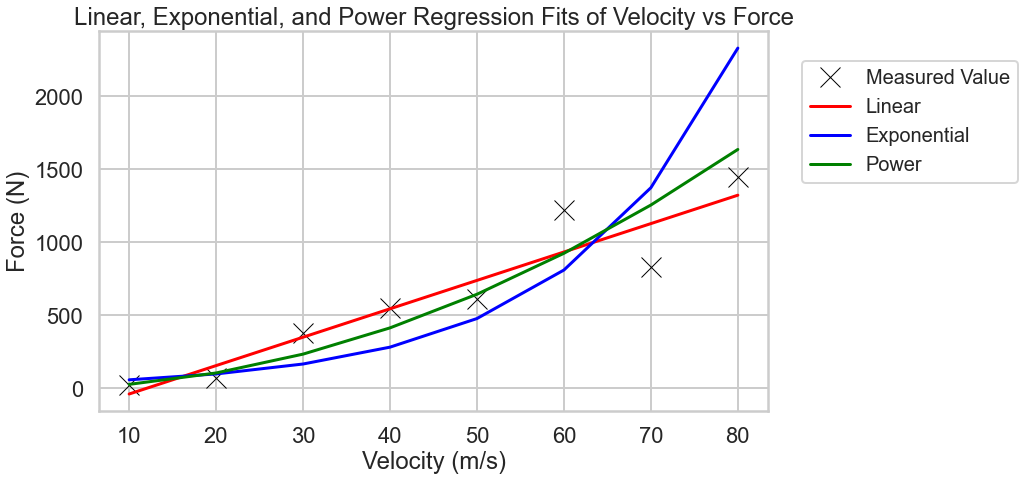

In [8]:
#plot results
x = velocity
y = force
plt.plot(x,y,'x',c='black', markersize=20)
y = a0 + (a1*velocity)
plt.plot(x, y, 'red')
y = exp_a0 * np.exp(exp_a1*velocity)
plt.plot(x, y, 'blue')
y = pwr_a0 * (velocity**pwr_a1)
plt.plot(x, y, 'green')
plt.ylabel('Force (N)')
plt.xlabel('Velocity (m/s)')
plt.title('Linear, Exponential, and Power Regression Fits of Velocity vs Force')

#generate legend
line_0 = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
                          markersize=20, label='Measured Value')
line_1 = Line2D([0], [0], color='red', linewidth=3, linestyle='solid',label='Linear')
line_2 = Line2D([0], [0], color='blue', linewidth=3, linestyle='solid',label='Exponential')
line_3 = Line2D([0], [0], color='green', linewidth=3, linestyle='solid',label='Power')
lines = [line_0,line_1,line_2,line_3]
plt.legend(prop=dict(size='small'), loc=[1.05, 0.6],handles=lines)